In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [100]:
def openFile(path):
    df = pd.read_csv(path ,header=0, encoding='utf-8')
    return df

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

In [103]:
from sklearn.model_selection import cross_validate


def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):
    results = cross_validate(model, X, y, cv=cv,scoring=scoring,return_train_score=True)
    return [results['train_score'].mean(), results['test_score'].mean()]

In [104]:
def print_grid_search_result(grid_search):
    print(grid_search.best_params_)
    print("training score= {:.3f}; validation score={:.3f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_],
                                                                  grid_search.cv_results_['mean_test_score'][grid_search.best_index_]))
    

In [105]:
def getCorpus(df):
    corpus = df['processed_sentence'].iloc[:].values
    return corpus

In [106]:
def wordVector(corpus):
    word_bag = CountVectorizer().fit_transform(corpus)
    return word_bag

In [107]:
def splitData(word_bag, df):
    return train_test_split(word_bag, df['Sentiment'],test_size = 0.3, random_state=42)

In [108]:
def algoSelection(word_bag, df, X_train, X_test, y_train, y_test):
    models = [RandomForestClassifier(random_state=42), LogisticRegression(random_state=42), GradientBoostingClassifier(random_state=42), BernoulliNB()]
    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print(model)
        print("Training score: {0:.3f}".format(model.score(X_train,y_train)))
        print("Test score: {0:.3f}".format(model.score(X_test,y_test)))
        print(classification_report(y_test,y_pred))
        print()
        

In [109]:
from sklearn.model_selection import GridSearchCV
def gridSearchLogReg(word_bag, df, X_train, y_train):
    
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    
    clf = GridSearchCV(LogisticRegression(random_state=42), param_grid=grid, scoring="f1_macro", cv=7, return_train_score=True)
    clf.fit(X_train, y_train)
    print_grid_search_result(clf)

In [111]:
df= openFile('raw_labeled_500_notickers.csv')

In [112]:
df

,Unnamed: 0,Sentiment,processed_sentence
0,0,Buy,long dollarsign twtr dollarsign
1,1,Hold,sneak peek minussign tomorrow follow minussign...
2,2,Hold,dollarsign cook taking home
3,3,Buy,long
4,4,Hold,also minussign normally buy type stuff online ...
...,...,...,...
517,517,Hold,advice bagholders
518,518,Sell,minussign numberplaceholder share
519,519,Buy,call
520,520,Buy,used call


In [119]:
word_bag = wordVector(getCorpus(df))

In [121]:
print(word_bag)

  (0, 370)	1
  (0, 200)	2
  (0, 666)	1
  (1, 200)	1
  (1, 591)	1
  (1, 453)	1
  (1, 397)	2
  (1, 651)	1
  (1, 254)	1
  (1, 29)	1
  (2, 200)	1
  (2, 148)	1
  (2, 623)	1
  (2, 321)	1
  (3, 370)	1
  (4, 397)	1
  (4, 16)	1
  (4, 426)	1
  (4, 106)	1
  (4, 667)	1
  (4, 617)	1
  (4, 440)	1
  (4, 491)	1
  (4, 128)	1
  (4, 575)	1
  :	:
  (514, 562)	1
  (514, 501)	1
  (514, 285)	1
  (514, 303)	1
  (514, 155)	1
  (514, 271)	1
  (514, 234)	1
  (515, 397)	1
  (515, 431)	1
  (515, 456)	1
  (515, 209)	1
  (515, 705)	1
  (515, 193)	1
  (516, 109)	1
  (516, 307)	1
  (517, 63)	1
  (517, 7)	1
  (518, 397)	1
  (518, 431)	1
  (518, 572)	1
  (519, 109)	1
  (520, 109)	1
  (520, 678)	1
  (521, 200)	1
  (521, 109)	1


<font size="25">Bag-of-Words

In [114]:
X_train, X_test, y_train, y_test= splitData(word_bag, df)
scores = algoSelection(word_bag, df, X_train, X_test, y_train, y_test)
print(scores)

RandomForestClassifier(random_state=42)
Training score: 1.000
Test score: 0.847
              precision    recall  f1-score   support

         Buy       0.86      0.96      0.91        73
        Hold       0.94      0.64      0.76        47
        Sell       0.75      0.89      0.81        37

    accuracy                           0.85       157
   macro avg       0.85      0.83      0.83       157
weighted avg       0.86      0.85      0.84       157


LogisticRegression(random_state=42)
Training score: 0.951
Test score: 0.854
              precision    recall  f1-score   support

         Buy       0.89      0.93      0.91        73
        Hold       0.94      0.66      0.78        47
        Sell       0.73      0.95      0.82        37

    accuracy                           0.85       157
   macro avg       0.85      0.85      0.84       157
weighted avg       0.87      0.85      0.85       157


GradientBoostingClassifier(random_state=42)
Training score: 0.981
Test score: 0.

In [16]:
gridSearchLogReg(word_bag, df, X_train, y_train)

C:\Users\Ardit\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ardit\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
training score= 0.943; validation score=0.826


<font size="25"> TF-IDF</font>

In [115]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_sentence'], df['Sentiment'],test_size = 0.3, random_state=42)

In [116]:
tfidf_vectorizer = TfidfVectorizer() 
tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_vectors = tfidf_vectorizer.transform(X_test)


In [117]:

scores = algoSelection(word_bag, df, tfidf_train_vectors, tfidf_test_vectors, y_train, y_test)
print(scores)

RandomForestClassifier(random_state=42)
Training score: 1.000
Test score: 0.847
              precision    recall  f1-score   support

         Buy       0.86      0.95      0.90        73
        Hold       0.94      0.66      0.78        47
        Sell       0.75      0.89      0.81        37

    accuracy                           0.85       157
   macro avg       0.85      0.83      0.83       157
weighted avg       0.86      0.85      0.84       157


LogisticRegression(random_state=42)
Training score: 0.937
Test score: 0.860
              precision    recall  f1-score   support

         Buy       0.94      0.92      0.93        73
        Hold       0.89      0.72      0.80        47
        Sell       0.71      0.92      0.80        37

    accuracy                           0.86       157
   macro avg       0.85      0.85      0.84       157
weighted avg       0.87      0.86      0.86       157


GradientBoostingClassifier(random_state=42)
Training score: 0.995
Test score: 0.

<font size="25">N-grams

In [28]:
bigram_vectorizer = CountVectorizer(ngram_range=(1,3), token_pattern=r'\b\w+\b', min_df=1)
#adjust range to get bi or tri grams
bg = bigram_vectorizer.fit_transform(getCorpus(df))

In [29]:
bg_features = bigram_vectorizer.get_feature_names()
bg_features

C:\Users\Ardit\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['able',
 'able buy',
 'able buy call',
 'according',
 'acquisition',
 'acquisition cooperation',
 'acquisition cooperation expanding',
 'action',
 'actually',
 'actually call',
 'adding',
 'adding numberplaceholder',
 'adding numberplaceholder premium',
 'adj',
 'advice',
 'advice bagholders',
 'advisor',
 'advisor financial',
 'advisor financial advice',
 'afraid',
 'afraid buy',
 'afraid buy call',
 'ahrendts',
 'ahrendts depart',
 'ahrendts depart april',
 'aircraft',
 'aircraft effort',
 'aircraft effort attract',
 'airline',
 'airline adding',
 'airline adding numberplaceholder',
 'align',
 'align business',
 'align business three',
 'almost',
 'almost numberplaceholder',
 'almost numberplaceholder aircraft',
 'alphabet',
 'alphabet earnings',
 'alphabet earnings thread',
 'also',
 'also looking',
 'also looking microsoft',
 'also minussign',
 'also minussign normally',
 'also scared',
 'always',
 'always bagholders',
 'always bagholders lick',
 'amazon',
 'amazon earnings',
 'am

In [30]:
X_train, X_test, y_train, y_test = train_test_split(bg, df['Sentiment'],test_size = 0.3, random_state=42)

In [31]:

scores = algoSelection(word_bag, df, X_train, X_test, y_train, y_test)
print(scores)

RandomForestClassifier(max_depth=5, random_state=42)
Training score: 0.564
Test score: 0.561
              precision    recall  f1-score   support

         Buy       0.51      1.00      0.68        73
        Hold       1.00      0.13      0.23        47
        Sell       1.00      0.24      0.39        37

    accuracy                           0.56       157
   macro avg       0.84      0.46      0.43       157
weighted avg       0.77      0.56      0.48       157


LogisticRegression(random_state=42)
Training score: 0.995
Test score: 0.854
              precision    recall  f1-score   support

         Buy       0.86      0.95      0.90        73
        Hold       0.94      0.66      0.78        47
        Sell       0.77      0.92      0.84        37

    accuracy                           0.85       157
   macro avg       0.86      0.84      0.84       157
weighted avg       0.86      0.85      0.85       157


GradientBoostingClassifier(random_state=42)
Training score: 1.000
T

## GRID SEARCH

In [108]:
import mglearn

def plot_grid_search_results(grid_search):
    '''For grids with 2 hyperparameters, create a heatmap plot of test scores
        
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        uses mglearn.tools.heatmap() for plotting.
    
    '''
    results = pd.DataFrame(grid_search.cv_results_)

    params = sorted(grid_search.param_grid.keys())
    
    assert len(params) == 2, "We can only plot two parameters."
    
    # second dimension in reshape are rows, needs to be the fast changing parameter
    scores = np.array(results.mean_test_score).reshape(len(grid_search.param_grid[params[0]]),
                                                      len(grid_search.param_grid[params[1]]))

    # plot the mean cross-validation scores
    # x-axis needs to be the fast changing parameter
    mglearn.tools.heatmap(scores, 
                          xlabel=params[1], 
                          xticklabels=grid_search.param_grid[params[1]], 
                          ylabel=params[0], 
                          yticklabels=grid_search.param_grid[params[0]],
                          cmap="viridis", fmt="%0.3f")

In [123]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_sentence'], df['Sentiment'],test_size = 0.3, random_state=42)

In [124]:
tfidf_vectorizer = TfidfVectorizer() 
tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_vectors = tfidf_vectorizer.transform(X_test)


In [125]:
# Grid search on TF-IDF Gradient Boosted Classifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

gbc = GradientBoostingClassifier(random_state=42, n_estimators = 300)

learning_rate = [0.005, 0.01, 0.05, 0.1]
max_depth = [3, 5, 8, 12]

parameters = dict(learning_rate=learning_rate, max_depth=max_depth)

clf = GridSearchCV(gbc, parameters, cv = 7, return_train_score = True, scoring = "f1_weighted", n_jobs = -1)

In [126]:
clf.fit(tfidf_train_vectors, y_train)

GridSearchCV(cv=7,
             estimator=GradientBoostingClassifier(n_estimators=300,
                                                  random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 8, 12]},
             return_train_score=True, scoring='f1_weighted')

In [127]:
print_grid_search_result(clf)

{'learning_rate': 0.01, 'max_depth': 12}
training score= 1.000; validation score=0.810


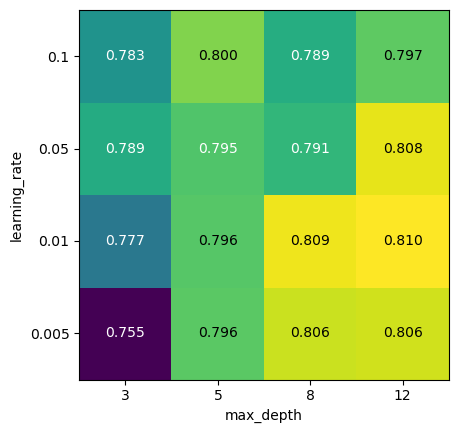

In [128]:
plot_grid_search_results(clf)

## Train Final Model and Predict Remaining

In [148]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_sentence'], df['Sentiment'],test_size = 0.3, random_state=42)
tfidf_vectorizer = TfidfVectorizer() 
tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

training_vocabulary = tfidf_vectorizer.vocabulary_

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)




In [152]:
training_vocabulary.keys()

dict_keys(['newswires', 'industrials', 'increased', 'quarterly', 'dividend', 'numberplaceholder', 'percentsign', 'usd', 'per', 'share', 'call', 'dollarsign', 'started', 'option', 'trading', 'last', 'summer', 'watching', 'profit', 'porn', 'yolo', 'yoloing', 'moon', 'rocketemoji', 'gmeusdgamestop', 'corp', 'minussign', 'class', 'axxxxxxxw', 'interest', 'borrow', 'rate', 'available', 'according', 'tldr', 'gemstoneemoji', 'raisedbackofhandemoji', 'seems', 'bullish', 'miss', 'production', 'number', 'short', 'digital', 'realty', 'trust', 'inc', 'core', 'ffo', 'eps', 'bag', 'holder', 'amc', 'fullmoonfaceemoji', 'buyer', 'march', 'hodl', 'long', 'unum', 'group', 'put', 'fuck', 'bearish', 'sentiment', 'tesla', 'downgraded', 'capital', 'buy', 'plussign', 'elon', 'musk', 'anime', 'gambling', 'girl', 'however', 'sell', 'end', 'day', 'destroy', 'defeated', 'daily', 'tarot', 'card', 'prediction', 'friday', 'january', 'get', 'mclaren', 'selling', 'shout', 'people', 'telling', 'week', 'unlimited', 'te

In [136]:
# Use best parameters from grid search
model = GradientBoostingClassifier(random_state=42, n_estimators = 300, max_depth = 8, learning_rate = 0.01)

model.fit(tfidf_train_vectors,y_train)
y_pred = model.predict(tfidf_test_vectors)
print(model)
print(classification_report(y_test,y_pred))

GradientBoostingClassifier(learning_rate=0.01, max_depth=8, n_estimators=300,
                           random_state=42)
              precision    recall  f1-score   support

         Buy       0.82      0.95      0.88        73
        Hold       0.91      0.62      0.73        47
        Sell       0.80      0.89      0.85        37

    accuracy                           0.83       157
   macro avg       0.84      0.82      0.82       157
weighted avg       0.84      0.83      0.83       157



In [142]:
# train remaining data
remaining_df = pd.read_csv('df_sentences_for_ml_to_label_clean.csv', index_col = 0)
remaining_df

,processed_sentence
14,dollarsign minussign buyer dollarsign march do...
15,someone placing big bet oversold going earnings
16,dollarsign minussign buyer dollarsign plussign...
17,dollarsign minussign buyer dollarsign march do...
18,dollarsign minussign buyer dollarsign january ...
...,...
56637,total close right come numberplaceholder numbe...
56638,officially fking millionaire
56639,thank abel avellan
56640,thank wsb


In [155]:
tfidf_vectorizer = TfidfVectorizer(vocabulary = training_vocabulary.keys()) 
tfidf_vectors = tfidf_vectorizer.fit_transform(remaining_df['processed_sentence'])

In [158]:
remaining_df['ML Sentiment'] = model.predict(tfidf_vectors)

In [166]:
remaining_df.to_csv("ML Predicted Sentiment.csv")

**ARDIT'S GRAPH**

In [3]:
df_viz = openFile('df_sentences_fully_labeled_clean.csv')

In [16]:
df_viz['create_Time'] = pd.to_datetime(df_viz['Time of Creation'])

In [21]:
df_viz['create_Time']= df_viz['create_Time'].dt.date

In [22]:
df_viz

,id,Time of Creation,ticker,Sentiment,create_Time
0,adavc8,1/6/2019 15:44,NVDA,Hold,2019-01-06
1,adavc8,1/6/2019 15:44,NVDA,Sell,2019-01-06
2,adavc8,1/6/2019 15:44,SPOT,Buy,2019-01-06
3,adavc8,1/6/2019 15:44,BMY,Hold,2019-01-06
4,adavc8,1/6/2019 15:44,CAR,Hold,2019-01-06
...,...,...,...,...,...
55378,yijwh8,10/31/2022 12:14,META,Hold,2022-10-31
55379,yij4lh,10/31/2022 11:48,GME,Sell,2022-10-31
55380,ym8xvf,11/4/2022 14:07,TSLA,Buy,2022-11-04
55381,yn3mcb,11/5/2022 13:26,AMZN,Buy,2022-11-05


In [76]:
df_viz = df_viz.drop(columns=['Time of Creation', 'Sentiment', 'id'])

KeyError: "['Time of Creation', 'Sentiment'] not found in axis"

In [77]:
df_viz = df_viz.drop(columns=['id'])

In [92]:
df1=df_viz.groupby(['create_Time'], as_index=False).value_counts()

In [93]:
print(df1)

      create_Time ticker  count
0      2019-01-01     SQ      1
1      2019-01-02   AAPL      4
2      2019-01-02    AMD      1
3      2019-01-02   TSLA      1
4      2019-01-03   AAPL      3
...           ...    ...    ...
15975  2022-11-14   GAIN      1
15976  2022-11-14  FORTY      1
15977  2022-11-14     DM      1
15978  2022-11-14    AMC      1
15979  2022-11-14     AM      1

[15980 rows x 3 columns]


In [96]:
df1.to_csv('aggregated_mentions.csv')